# CR-P0 Finite Elements for Stokes Equations

This example is to show the convergence of CR-P0 finite elements for the Stokes equation on the unit square:

$$- \Delta u + {\rm grad}\, p  = f \quad {\rm div}\, u    = 0  \quad  \text{ in } \quad \Omega,$$

with the pure Dirichlet boundary condition. The solver is based on a DGS type smoother. 

**References**:
- [Finite Element Methods For Stokes Equations](http://www.math.uci.edu/~chenlong/226/FEMStokes.pdf)
- [Project: Finite Element Methods for Stokes Equations](../project/projectFEM.html)

**Subroutines**:

    - StokesCRP0
    - squareStokes
    - femStokes
    - StokesCRP0femrate
    
The method is implemented in `StokesCRP0` subroutine and can be tested in `squareStokes`. Together with other elements (P2P0, P2P1, isoP2P0, isoP2P1, P1bP1), `femStokes` provides a concise interface to solve Stokes equation. The CR-P0 element is tested in `Stokesfemrate`.

## CR-P0 element

The velocity is CR non-conforming linear element and the pressure is P0 piecewise constant element. 

We list the basis for CR below and refer to [PoissonCRfemrate](PoissonCRfemrate.html) for detailed data structure for CR element. 

The 3 Lagrange-type bases functions are denoted by $\phi_i, i=1:3$, i.e. $\phi_i(m_j)=\delta _{ij},i,j=1:3$, where $m_i$ is the middle point of the i-th edge. In barycentric coordinates, they are:

$$\phi_i = 1- 2\lambda_i,\quad \nabla \phi_i = -2\nabla \lambda_i,$$


Since the unknowns are associated to edges, we need to generate edges and the indices map from a triangle to global indices of its three edges. The edges are labled such that the i-th edge is opposite to the i-th vertex for i=1,2,3.


elem2edge =

  1x3 uint32 row vector

   3   2   1



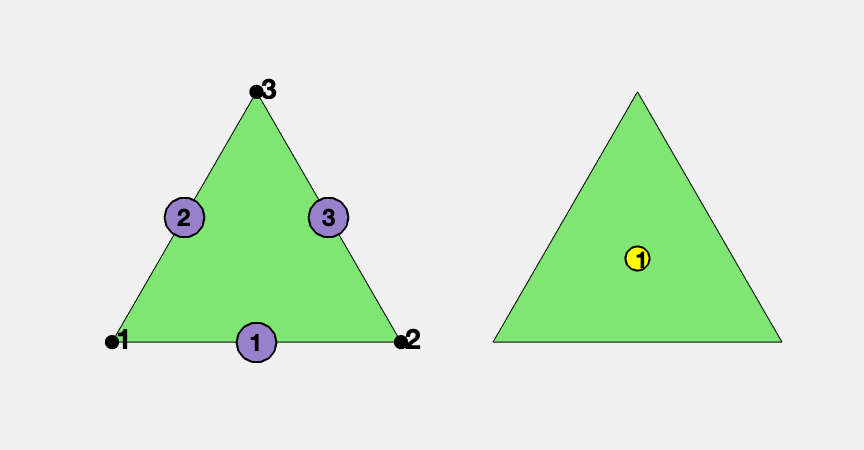

In [3]:
clear all;
imatlab_export_fig('print-png')  % Static png figures.
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1, 2, 3];
[elem2edge,edge] = dofedge(elem);
set(gcf,'Units','normal'); 
set(gcf,'Position',[0.25,0.25,0.3,0.25]);
subplot(1,2,1); showmesh(node,elem); findnode(node); findedge(node,edge);
subplot(1,2,2); showmesh(node,elem); findelem(node,elem);
display(elem2edge)

## Dirichlet boundary condition

In [7]:
%% Setting
% mesh
[node,elem] = squaremesh([0,1,0,1],0.25);
[node,elem] = uniformrefine(node,elem);
bdFlag = setboundary(node,elem,'Dirichlet');
mesh = struct('node',node,'elem',elem,'bdFlag',bdFlag);
% pde
pde = Stokesdata1; 
% options
option.L0 = 0;
option.maxIt = 4;
option.printlevel = 1;
option.solver = 'mg';

#dof:   1984,  #nnz:   9280, level:  3  MG WCYCLE iter:  9,  err = 6.7087e-09,  time = 0.11 s
#dof:   8064,  #nnz:  38016, level:  4  MG WCYCLE iter:  9,  err = 6.8886e-09,  time = 0.15 s
#dof:  32512,  #nnz: 153856, level:  5  MG WCYCLE iter:  9,  err = 7.2684e-09,  time = 0.51 s
#dof: 130560,  #nnz: 619008, level:  6  MG WCYCLE iter:  9,  err = 7.4799e-09,  time =  2.4 s
Table: Error
 #Dof        h      |u_I-u_h|_1    ||u-u_h||   ||u_I-u_h||_{max}

  2112   6.25e-02   1.39954e+00   4.90098e-02   1.32091e-01
  8320   3.12e-02   7.18220e-01   1.28301e-02   3.72726e-02
 33024   1.56e-02   3.62378e-01   3.25995e-03   1.00379e-02
131584   7.81e-03   1.81727e-01   8.19377e-04   2.63052e-03

 #Dof        h      ||p_I-p_h||    ||p-p_h||   

  2112   6.25e-02   6.34277e-01   9.42925e-01
  8320   3.12e-02   2.17142e-01   4.10772e-01
 33024   1.56e-02   7.60130e-02   1.90168e-01
131584   7.81e-03   2.96038e-02   9.20441e-02

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    



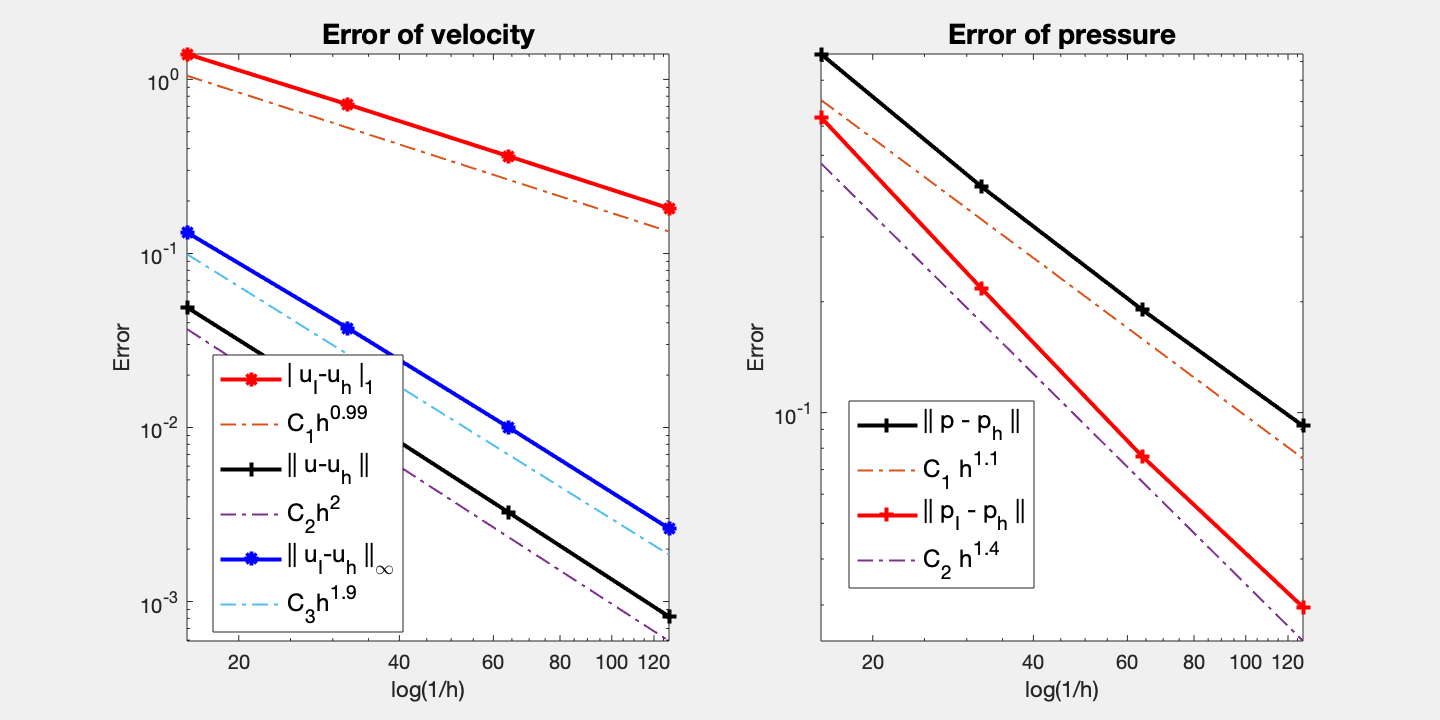

In [6]:
option.elemType = 'CRP0';
femStokes(mesh,pde,option);

## Conclusion

Optimal order convergence of velocity and pressure is observed. First order for velocity in H1 norm and for pressure in L2 norm. Second order for velocity in L2 and maximum norm. For pressure, half order superconvergence when compare to interpolate.

Multigrid solver based on DGS smoother converges uniformly. 

To-Do: test other boundary conditions.